3
Dress


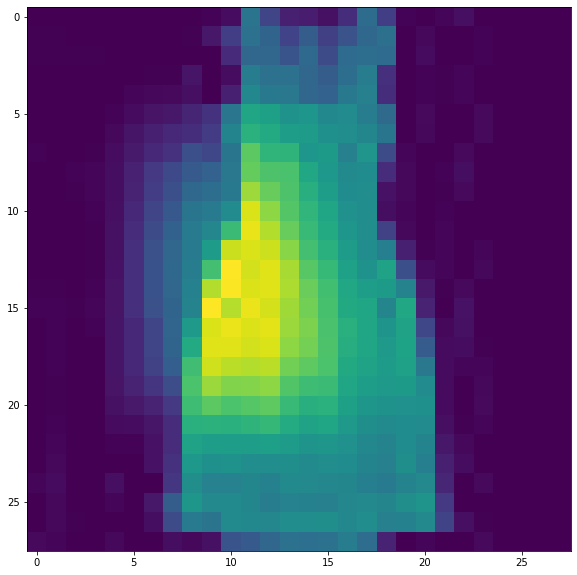

In [1]:
import os
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model
from training import get_data
from utility_functions import make_gradcam_heatmap
from utility_functions import save_and_display_gradcam
from params import label_name
data_name = 'fashion_mnist'
train_X, train_y, test_X, test_y = get_data(data_name=data_name)
MODEL_DIR, version = 'models_repo', 1
export_path = os.path.join(MODEL_DIR, str(version))
model = load_model('model_repo/model1')
k = 330

x, y = test_X[k].reshape(1, 28, 28, 1), test_y[k]
preds = model.predict(x)
#preds_prob = model.predict_proba(x)
print(y)
name = label_name(y)
last_conv_layer_name = 'conv2d_layer_3'
heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name)
print(name)
save_and_display_gradcam(x, heatmap)
